In [8]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [9]:
df.Pos.value_counts()

Pos
SG    50
C     50
Name: count, dtype: int64

Text(0.5, 1.0, 'STL and 2P in 2d plane')

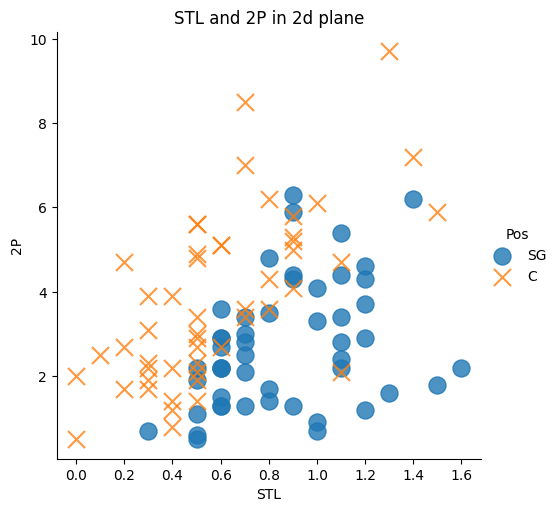

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#스틸, 2점슛 데이터 시각화
sns.lmplot(x='STL', y='2P', data = df, fit_reg=False, # x 축, y 축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점의 크기
           markers=["o","x"],
           hue="Pos" #예측
           )
#타이틀
plt.title('STL and 2P in 2d plane')

Text(0.5, 1.0, 'BLK and 3P in 2d plane')

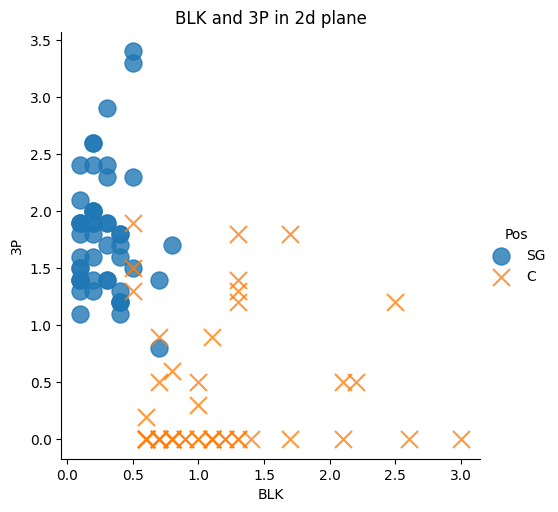

In [11]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot(x='BLK', y='3P', data = df, fit_reg=False, # x 축, y 축, 데이터, 노 라인
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") #예측값
# 타이틀
plt.title('BLK and 3P in 2d plane')

In [12]:
df.drop(['2P','AST','STL'], axis=1, inplace = True) # 분별력이 없는 특징(feature)을 데이터에서 제거합니다
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [13]:
# 사이킷런의 train_test_split을 사용하면 코드 한 줄로 손쉽게 데이터를 나눌 수 있습니다.
from sklearn.model_selection import train_test_split

In [14]:
# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다
train, test = train_test_split(df,test_size=0.2)

In [15]:
train.shape[0]
test.shape[0]

20

In [16]:
# kNN 라이브러리 추가
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [17]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정
max_k_range = train.shape[0]//2
k_list = []
for i in range(3,max_k_range,2):
  k_list.append(i)

cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,x_train,y_train.values.ravel(),cv = 10,
                           scoring ='accuracy')
  cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.925,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.925,
 0.9375,
 0.925,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.8375,
 0.8375]

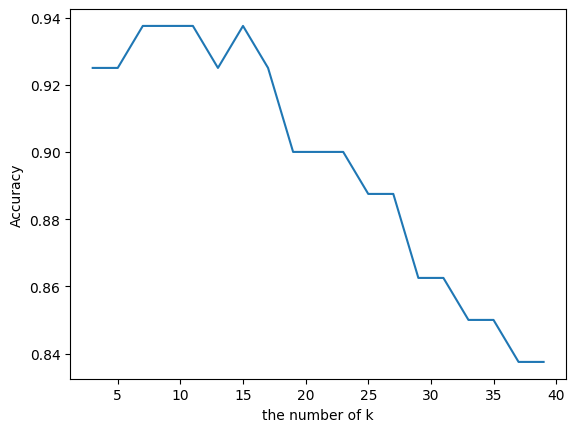

In [18]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [19]:
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 7


In [20]:
# 라이브러리 임포트
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용될 속성을 지정
x_train = train[['3P', 'BLK', 'TRB']]
# 선수 포지션을 예측할 값으로 지정
y_train = train[['Pos']]

# kNN 모델 학습
knn.fit(x_train,y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용될 속성을 지정
x_test = test[['3P', 'BLK', 'TRB']]

# 선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

# 테스트 시작
pred = knn.predict(x_test)

# 모델 예측 정확도(accuracy) 출력
print("accuracy: " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy: 0.8


In [21]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,C,C
2,SG,C
3,C,C
4,SG,SG
5,SG,SG
6,SG,SG
7,SG,SG
8,C,C
9,SG,C
